<a href="https://colab.research.google.com/github/kshitijbajpai/TerrorismEDA/blob/main/GlobalTerrorismEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   Global Terrorism EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Kshitij Bajpai


# **Project Summary -**

 Project provides valuable insights into various aspects of terrorism, including the geographic distribution of attacks, target types, attack methods, and other useful insights. This information helps in identifying trends and hotspots of terrorist activities, assessing the effectiveness of counterterrorism efforts, and developing evidence-based strategies to combat terrorism.

 Project serves as a vital resource in the field of terrorism studies. It enhances our understanding of terrorism as a global phenomenon and supports efforts to counter and prevent acts of terrorism worldwide. By providing comprehensive and reliable data, the project contributes to evidence-based policymaking, fostering a safer and more secure world.

# **GitHub Link -**

(https://https://github.com/kshitijbajpai/TerrorismEDA/blob/main/GlobalTerrorismEDA.ipynb)

#**Let's Begin**

##1. **Know your Data**

###Import Libraries

In [55]:
#Import Libraires
import numpy as np
import pandas as pd

#Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Import Warnings
import warnings
warnings.filterwarnings('ignore')

###Dataset Loading


In [56]:
#loading dataset from github
#here encoding is use else it will throw an error
data=pd.read_csv('https://media.githubusercontent.com/media/kshitijbajpai/TerrorismEDA/main/GlobalTerrorismData.csv', encoding='latin-1')

### Dataset First View


In [57]:
#first look of the dataset
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


###Data rows and columns count


In [58]:
#checking aur dataset
#show rows then columns

data.shape

(181691, 135)

In [59]:
#checking number of rows and columns using shape
print("Number of rows are", data.shape[0])
print("Number of rows are", data.shape[1])

Number of rows are 181691
Number of rows are 135


###Dataset Info

In [60]:
#getting information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


####Duplicate Values

In [61]:
#checking duplicate values
print("Number of Duplicated values are:",data.duplicated().sum())

Number of Duplicated values are: 0


#### Missing Values/Null Values

In [62]:
#checking null values
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

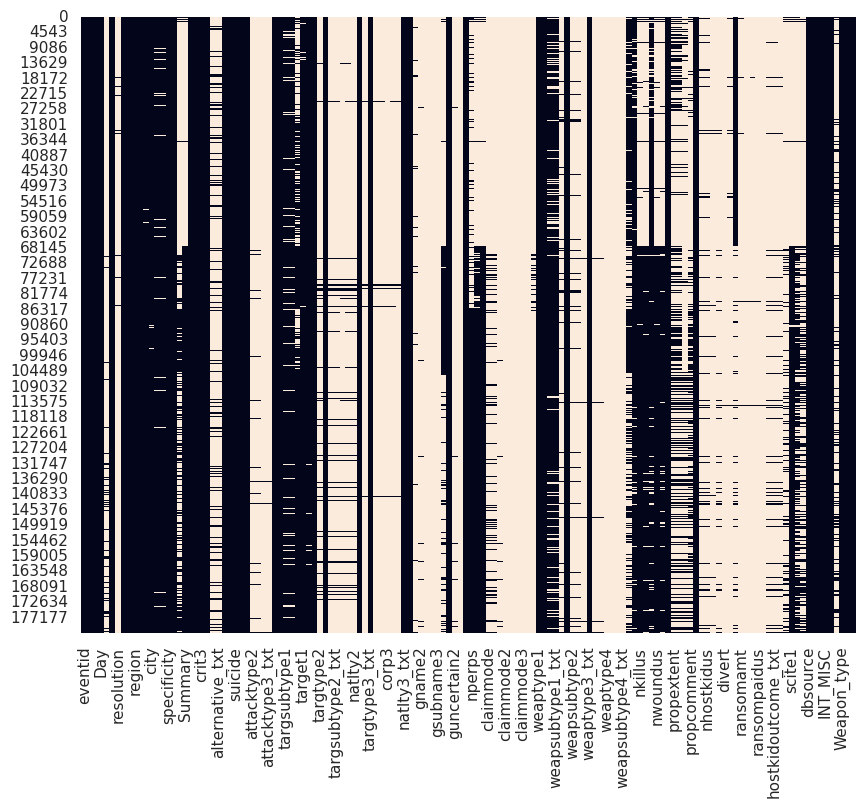

In [107]:
#plotting heat map for null values
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [109]:
#replacing any missing or NaN values in the weaptype1_txt,weaptype2_txt,weaptype3_txt column of the data dataframe with an empty string ''.

data['weaptype1_txt'] = data['weaptype1_txt'].fillna('')
data['weaptype2_txt'] = data['weaptype2_txt'].fillna('')
data['weaptype3_txt'] = data['weaptype3_txt'].fillna('')

#Concatenation

data['Weapon_type'] = data['weaptype1_txt'] + data['weaptype2_txt'] + data['weaptype3_txt']
data['Weapon_type']

0            Unknown
1            Unknown
2            Unknown
3         Explosives
4         Incendiary
             ...    
181686      Firearms
181687    Explosives
181688    Incendiary
181689    Explosives
181690    Explosives
Name: Weapon_type, Length: 181691, dtype: object

In [65]:
#filling the missing values of target
data['targtype1_txt'] = data['targtype1_txt'].fillna('')
data['targtype2_txt'] = data['targtype2_txt'].fillna('')
data['targtype3_txt'] = data['targtype3_txt'].fillna('')

data['Targettype'] = data['targtype1_txt'] + data['targtype2_txt'] + data['targtype3_txt']
data['Targettype']

0         Private Citizens & Property
1             Government (Diplomatic)
2                 Journalists & Media
3             Government (Diplomatic)
4             Government (Diplomatic)
                     ...             
181686                       Military
181687                       Military
181688    Private Citizens & Property
181689           Government (General)
181690                        Unknown
Name: Targettype, Length: 181691, dtype: object

In [66]:
#filling the missing values of victims nationality
data['natlty1_txt'] = data['natlty1_txt'].fillna('')
data['natlty2_txt'] = data['natlty2_txt'].fillna('')
data['natlty3_txt'] = data['natlty3_txt'].fillna('')
data['Victim_nationality'] = data['natlty1_txt'] + data['natlty2_txt'] + data['natlty3_txt']
data['Victim_nationality']

0         Dominican Republic
1                    Belgium
2              United States
3              United States
4              United States
                 ...        
181686               Somalia
181687                Russia
181688           Philippines
181689                 India
181690           Philippines
Name: Victim_nationality, Length: 181691, dtype: object

In [67]:
#Renaming columns
data.rename(columns={'event_id':'ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','Targettype':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'Weapon_type':'Weapon_type','motive':'Motive','property':'Property'},inplace=True)

In [68]:
# taking important data in whole dataset that I'll further processing and storing dataframe in other variable
df=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','Property']]

In [69]:
# Missing Values/Null Values Count
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target              0
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Property            0
dtype: int64

<Axes: >

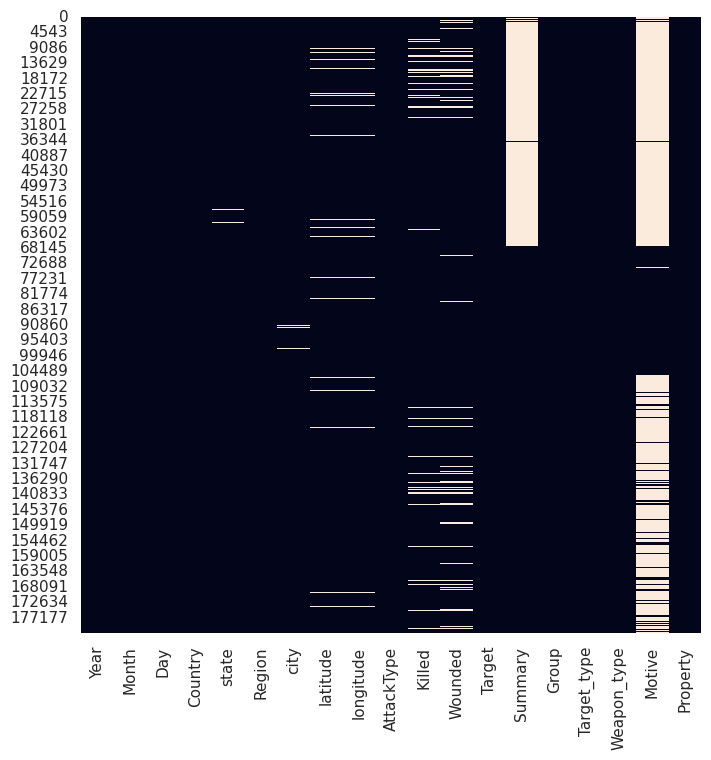

In [70]:
#visualizing missing values of important data
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(), cbar= False)

### What did you know about your dataset?

This Dataset belongs to Global Terrorism Database, and we have to analyze the cause and different insight that the dataset carried.

The Dataset contains 135 columns.

RangeIndex: 181691 entries, 0 to 181690

Columns: 135 entries, eventid to related dtypes: float64(55), int64(22), object(58) memory usage: 187.1+ MB

Shape and size of DataFrame is(181691, 135)



## **2. Understanding Your Variables**

In [71]:
#dataset columns
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive', 'Property'],
      dtype='object')

In [72]:
#dataset describe
df.describe(include='all')

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Property
count,181691.000000,181691.000000,181691.000000,181691,181270,181691,181257,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,181691,115562,181691,181691,181691,50561,181691.000000
unique,NaN,NaN,NaN,205,2855,12,36674,NaN,NaN,9,NaN,NaN,665,112492,3537,22,209,14490,NaN
top,NaN,NaN,NaN,Iraq,Baghdad,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,Private Citizens & Property,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown,NaN
freq,NaN,NaN,NaN,24636,7645,50474,9775,NaN,NaN,88255,NaN,NaN,42230,100,82782,43511,85750,14889,NaN
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,2.403272,3.167668,NaN,NaN,NaN,NaN,NaN,NaN,-0.544556
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,11.545741,35.949392,NaN,NaN,NaN,NaN,NaN,NaN,3.122889
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-9.000000
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


### Variables Description



Year:- Contaning year event happen

Month:- Containg month in which event happened

Day:- In which day event happen

Country:- The country where the attack was carried out.

State:- Sate in which event happened

Region:- Region in which event occured

City:- City in which event happened

Latitude: Latidues of place

Longitude:- Longitude of place

AttackType:- What type of attack it was

Killed:- How many were killed

Wounded:- How many were wounded

Target:- what the taget was

Summary:- Police report on the incident or what authority says on the incident

Group:- Which organization was behind the attack

Target_type:- What type of target was

Weapon_type:- What was weapon type

Motive: What was motive





## **3. Data Wrangling**

### Data Wrangling Code

In [73]:
#which years had most terror attacks
most_attacked_years=df['Year'].value_counts(dropna=False)
most_attacked_years.sort_values(ascending=False).head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

In [74]:
#cities which have been attacked most
most_attacked_city=df['city'].value_counts().sort_values(ascending=False)
most_attacked_city

Unknown       9775
Baghdad       7589
Karachi       2652
Lima          2359
Mosul         2265
              ... 
Shahkoh          1
Pleiku           1
Mabigo           1
Engelsdorf       1
Kubentog         1
Name: city, Length: 36674, dtype: int64

In [75]:
#country with most attacks
most_attacked_country= df['Country'].value_counts(dropna=False).sort_values(ascending=False)
most_attacked_country

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

In [76]:
#region with most attacks
most_attacked_region= df['Region'].value_counts(dropna=False).sort_values(ascending=False)
most_attacked_region

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [77]:
#which months attacked have been conducted most
most_attacked_months= df['Month'].value_counts(dropna=False).sort_values(ascending=False)
most_attacked_months

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64

In [78]:
#most attcking group
most_attacking_group= df['Group'].value_counts().sort_values(ascending=False)
most_attacking_group

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Thadou People's Liberation Army (TPLA)                  1
Quit Kashmir Movement (QKM)                             1
Cells of Direct Attack - Living Waste Group             1
Conspiracy of Vengeful Arsonists                        1
MANO-D                                                  1
Name: Group, Length: 3537, dtype: int64

In [79]:
#most_attack_type
most_attack_type= df['AttackType'].value_counts().sort_values(ascending=False).reset_index()
most_attack_type #displaying attack type

,index,AttackType
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


In [80]:
#summarizing data
print("Country with the most attacks:",most_attacked_country.index[0])
print("City with the most attacks:",most_attacked_city.index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",most_attacked_region.idxmax())
print("Year with the most attacks:",most_attacked_years.idxmax())
print("Month with the most attacks:",most_attacked_months.idxmax())
print("Group with the most attacks:",most_attacking_group.index[1])# as first value is unknown
print("Most Attack Types:",most_attack_type.index[0])

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: 0


####Cities with most attack


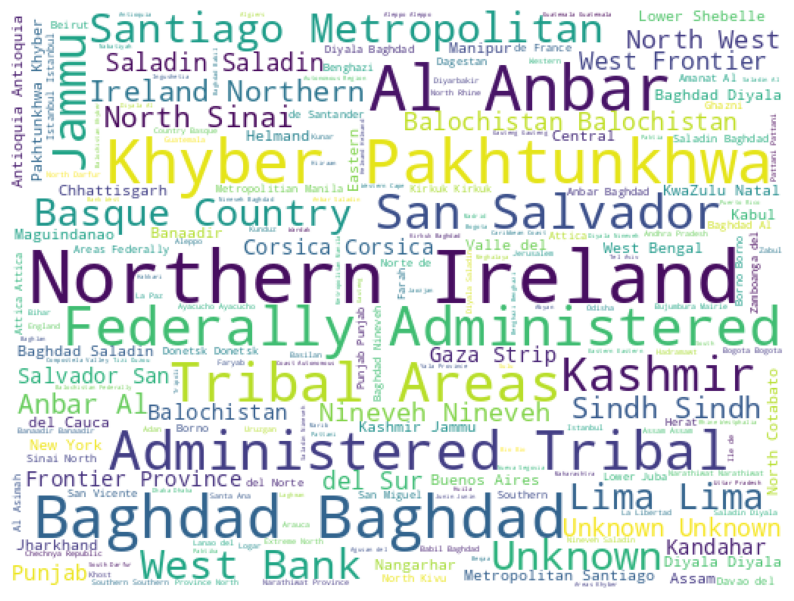

In [81]:
#Showing cities which most attack using WORDCLOUD
from wordcloud import WordCloud
from scipy import signal
cities = df.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

##**4.Data Visualization**

#####First lets make a color gradient function which we'll use later in the projects to make our plots visually more appealing.

In [82]:
#making a custom function for gradients in map
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


###1.Attacks by year

####How many terrorist attack occurred during the timeline of the dataset?


To find out this well plot a simple bar graph

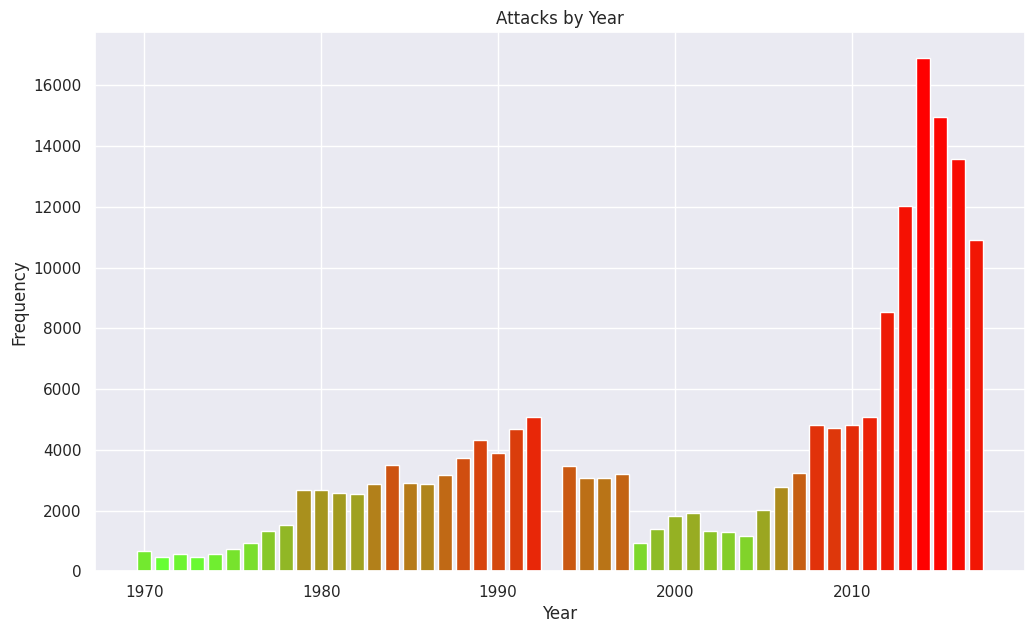

In [110]:

#create a bar graph
plt.figure(figsize=(12,7))
color1 = "#ff0000"
color2 = "#66ff33"
plt.bar(most_attacked_years.index, most_attacked_years.values, color=get_color_gradient(color1, color2,len(most_attacked_years.values)))

#Set the X and Y labels
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Attacks by Year")

#showing the graph
plt.show()



1.   We can see that from 1970 to 1992 there is upward trend in attacks

2.   From 1993 to 2004 we can see a downward trend in attacks

3.   And then from 2005 onwards we can see a upward trend in attacks with year 2014 having maximum number of attacks




###2.Attacks by months

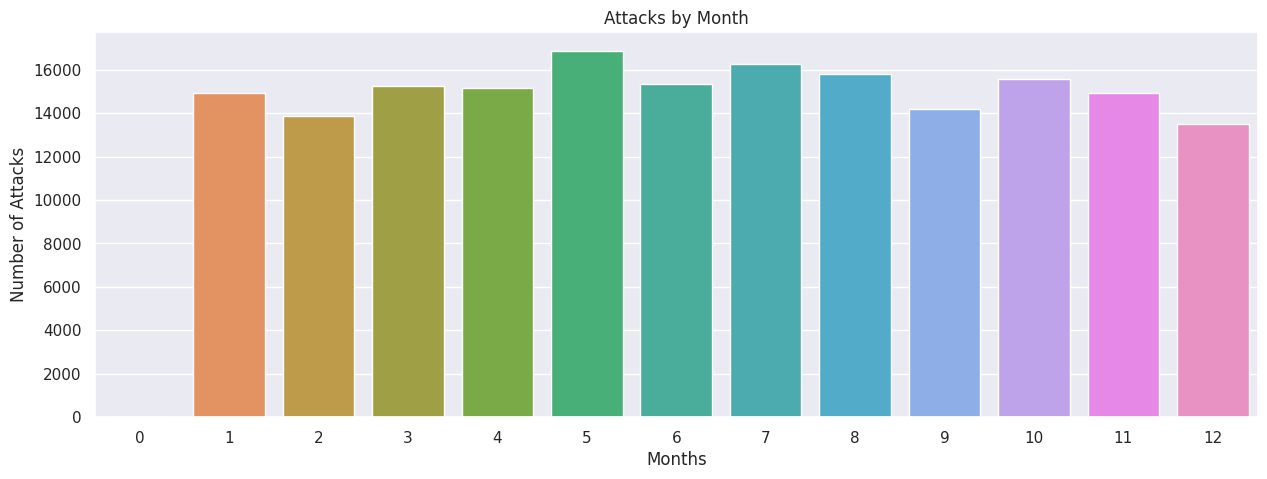

In [84]:
#plotting a countplot
plt.figure(figsize=(15,5))# giving size
plt.title('Attacks by Month')# giving title
sns.countplot(x=df.Month)#plotting countplot
plt.xlabel("Months")#giving name to x axis
plt.ylabel("Number of Attacks")#giving name to y axis
plt.show()#showing plot



1.   Here we can see that most attacks took place in 5th month i.e. May
2.   Rest other months have total number of attacks between 12000 to 16000



###3.Which target type was the most affected in all these attacks made over 47 years.?

Simple Barplot is used for data visualization

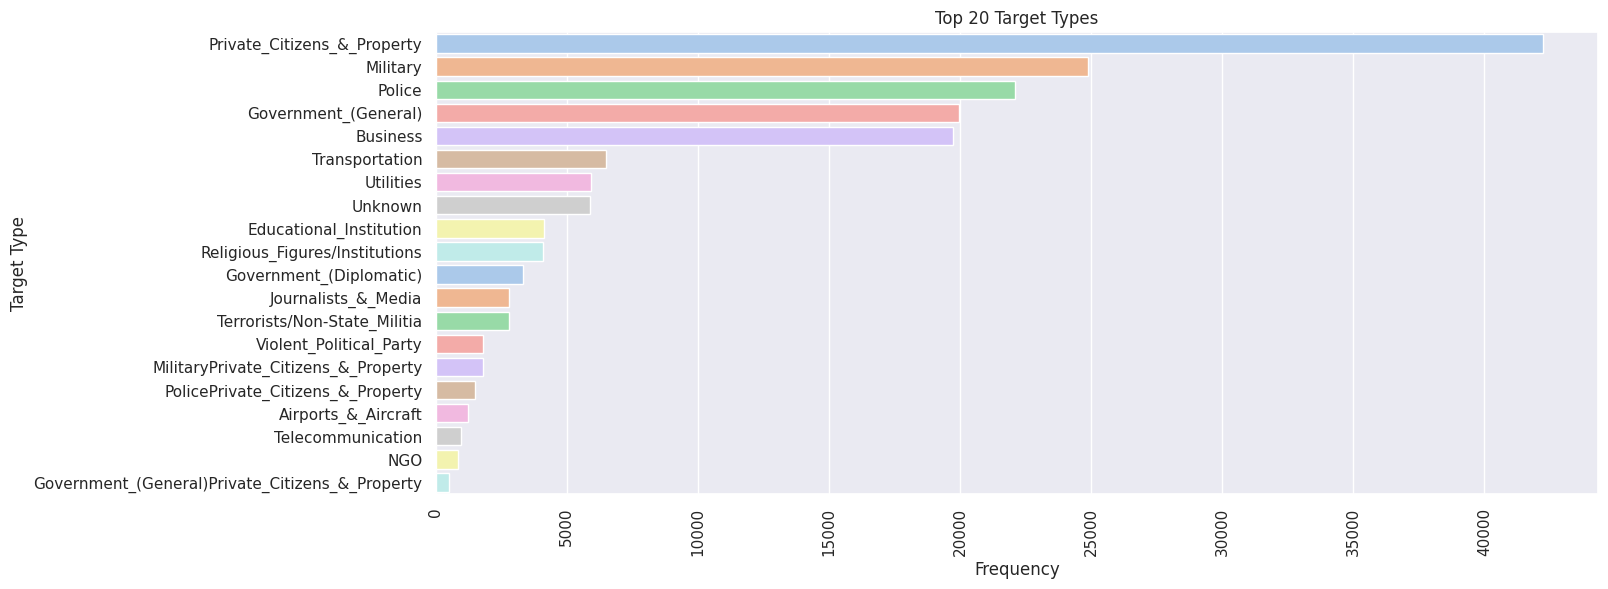

<Figure size 1200x600 with 0 Axes>

In [85]:

# Filter the top 20 target types
target_type = df[['Target']].value_counts().reset_index()
target_type['Target'] = target_type['Target'].str.replace(' ', '_')
target_type_filtered=target_type.head(20)


# Create a barplot using Seaborn
mx = sns.barplot(x=0, y='Target', data=target_type_filtered,palette='pastel')
#figure size
plt.figure(figsize=(12,6))
# Set the title and axes labels
mx.set_title("Top 20 Target Types")
mx.set_xlabel("Frequency")
mx.set_ylabel("Target Type")
mx.set_xticklabels(mx.get_xticklabels(), rotation=90)

# Show the plot
plt.show()


###4.Most attacked Target

In [86]:
#assigning most attacked target values to mat
mat=df['Target'].value_counts()
mat


Private Citizens & Property                                  42230
Military                                                     24876
Police                                                       22098
Government (General)                                         19950
Business                                                     19739
                                                             ...  
Religious Figures/InstitutionsJournalists & MediaMilitary        1
Educational InstitutionGovernment (General)Military              1
Private Citizens & PropertyTelecommunicationUtilities            1
TelecommunicationGovernment (General)                            1
BusinessNGONGO                                                   1
Name: Target, Length: 665, dtype: int64

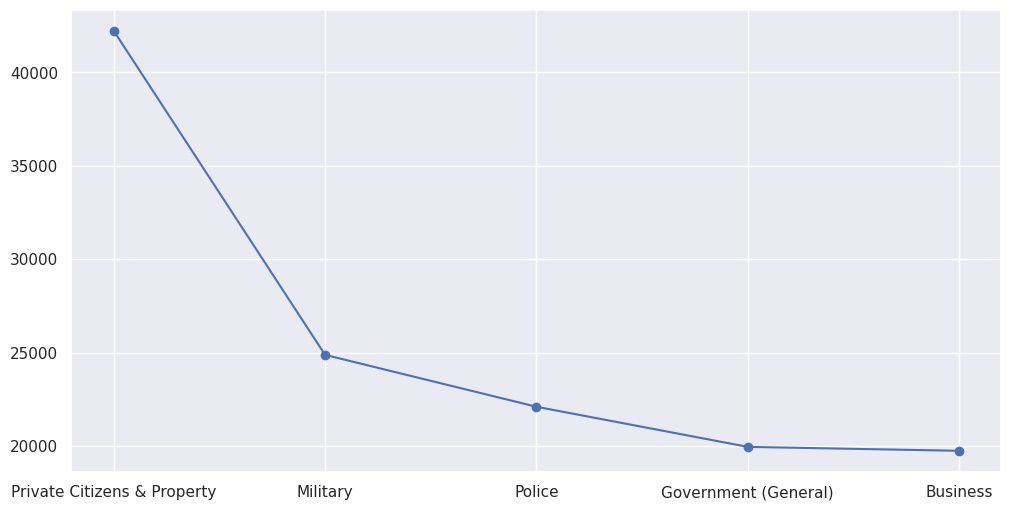

In [111]:
# plotting a line graph
plt.figure(figsize=(12,6))
plt.plot(mat.head(5),marker='o')
plt.xticks(rotation=0)
plt.show()



1.   Civilians are the most target group to people accounting to 6461 by Groups followed by soldiers(3157) and Patrol(2942)




###5.Active Groups

####Let's find out which organizations have attacked the most and get some visuals of it

In [88]:
# Better to take frequency above 500 as we are considering data of 47 years.
active_group = most_attacking_group[1:11]
active_group

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group, dtype: int64

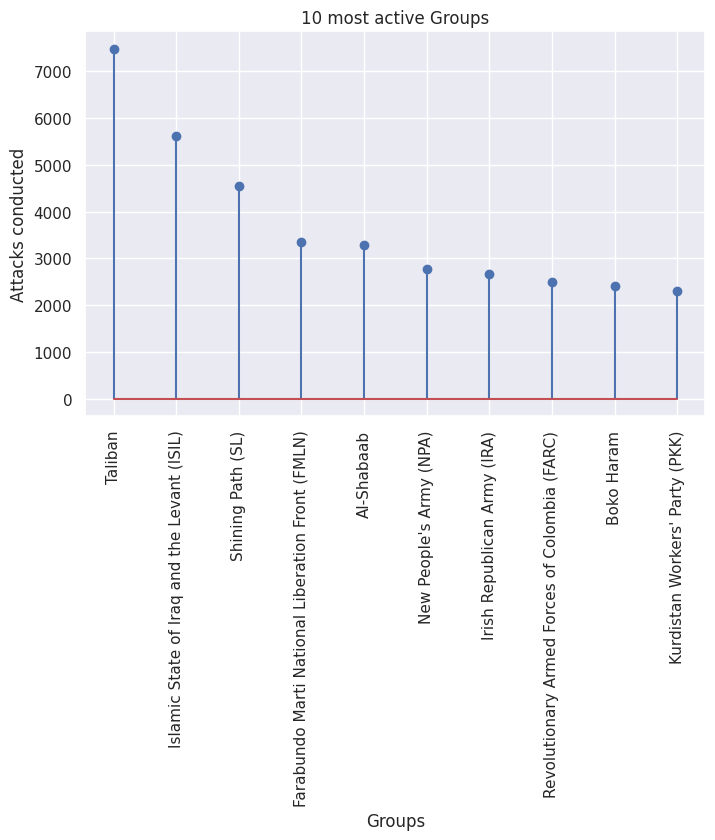

In [89]:
#create a stem graph
plt.figure(figsize=(8,5))
plt.stem(active_group.index, active_group.values)

#Set the X and Y labels
plt.title("10 most active Groups")
plt.xticks(rotation=90)
plt.xlabel("Groups")
plt.ylabel("Attacks conducted")

#showing the graph
plt.show()

We have found the most active groups that whih group do most attacks, and Taliban is at the top of the list followed by ISIL and Shining Path(SL) and second and third position

###6.Organizations which have caused maximum damage

Let's find out to organizations which have caused maximum damage

In [90]:
#sorting lethal groups on basis of kills and wounds
lethal_groups= df.groupby('Group')['Killed','Wounded'].sum().sort_values(by=['Killed','Wounded'], ascending=False)
lethal_groups

,Killed,Wounded
Group,,
Unknown,112367.0,210339.0
Islamic State of Iraq and the Levant (ISIL),38923.0,30672.0
Taliban,29410.0,27932.0
Boko Haram,20328.0,9473.0
Shining Path (SL),11601.0,3031.0
...,...,...
Zero Tolerance,0.0,0.0
Zimbabwe People's Army (ZIPA),0.0,0.0
Zuwar al-Imam Rida,0.0,0.0


In [91]:
#adding a column to lethal_groups
lethal_groups['TotalKW']=lethal_groups['Killed']+lethal_groups['Wounded']
lethal_groups

,Killed,Wounded,TotalKW
Group,,,
Unknown,112367.0,210339.0,322706.0
Islamic State of Iraq and the Levant (ISIL),38923.0,30672.0,69595.0
Taliban,29410.0,27932.0,57342.0
Boko Haram,20328.0,9473.0,29801.0
Shining Path (SL),11601.0,3031.0,14632.0
...,...,...,...
Zero Tolerance,0.0,0.0,0.0
Zimbabwe People's Army (ZIPA),0.0,0.0,0.0
Zuwar al-Imam Rida,0.0,0.0,0.0


In [92]:
#selecting top 10 lethal groups excluding unknown
top_ten_lethal_groups= lethal_groups[1:11].reset_index()
top_ten_lethal_groups

,Group,Killed,Wounded,TotalKW
0,Islamic State of Iraq and the Levant (ISIL),38923.0,30672.0,69595.0
1,Taliban,29410.0,27932.0,57342.0
2,Boko Haram,20328.0,9473.0,29801.0
3,Shining Path (SL),11601.0,3031.0,14632.0
4,Liberation Tigers of Tamil Eelam (LTTE),10989.0,11031.0,22020.0
5,Al-Shabaab,9330.0,7624.0,16954.0
6,Farabundo Marti National Liberation Front (FMLN),8065.0,4065.0,12130.0
7,Nicaraguan Democratic Force (FDN),6662.0,734.0,7396.0
8,Tehrik-i-Taliban Pakistan (TTP),6042.0,9532.0,15574.0
9,Revolutionary Armed Forces of Colombia (FARC),5661.0,4354.0,10015.0


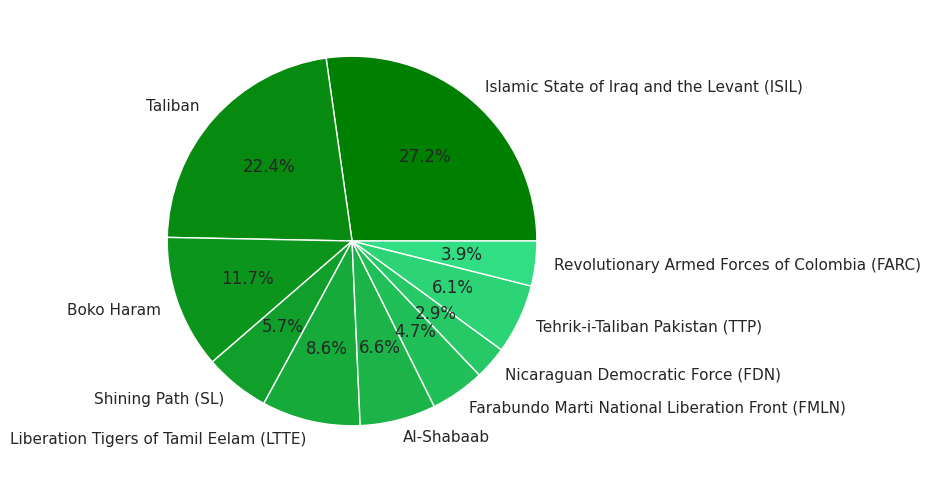

In [93]:
#plotting a pie
color1='#008000'
color2='#32de84'
y = top_ten_lethal_groups['TotalKW']
mylabels = top_ten_lethal_groups['Group']
plt.pie(y, labels = mylabels,autopct='%1.1f%%', colors=get_color_gradient(color1, color2, len(y) ))
plt.show()


Groups which have caused most human damage are Islamic State if Iraq and the Levant(ISIL) accountinng to 27.2% of damage and then comes Taliban with 22.4% damage and then Boko Haram with 11.7% damage

###7.Number of terrorist activity by region each year

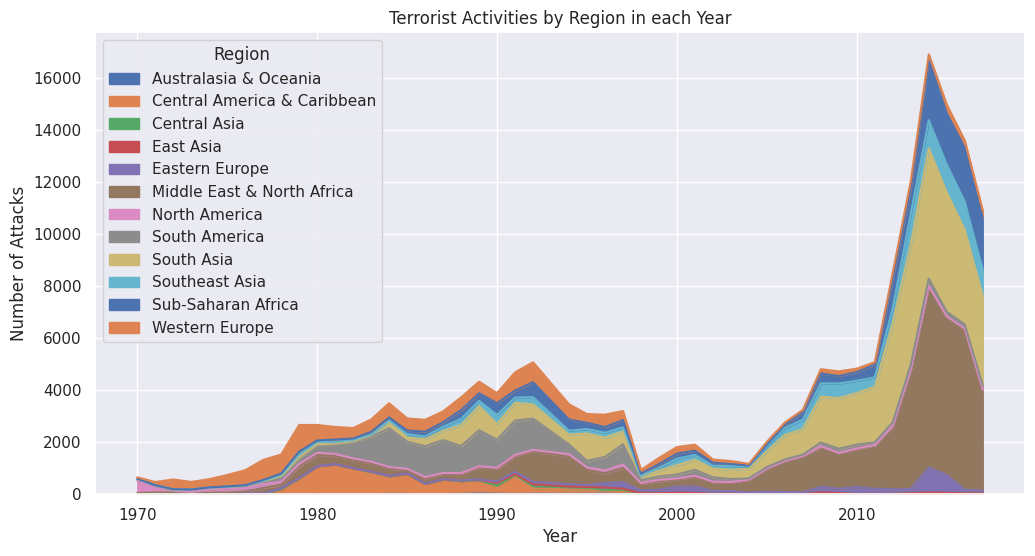

In [94]:
#using crosstab
#plotting a area graph
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(12,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

pd.crosstab is a function provided by the pandas library in Python that is used to compute a cross-tabulation (also known as a contingency table) of two or more factors or variables. It is a convenient way to analyze and summarize the relationship between categorical variables.



1.   Here we can find that most attacked regions are Middle East & North Africa and South Asia
2.   Least attacked regions are Australia & Oceania, Cental Asia and East Asia



###8.Most affected country

Most affected countries will be the countries having most number of casulities and property damage

In [95]:
#most affected country
most_affected_country= df.groupby('Country')['Killed','Wounded'].sum().sort_values(by=['Killed','Wounded'],ascending=False).reset_index()
most_affected_country['Total_casualities']=most_affected_country['Killed']+most_affected_country['Wounded']
most_affected_country.loc[0:9]

,Country,Killed,Wounded,Total_casualities
0,Iraq,78589.0,134690.0,213279.0
1,Afghanistan,39384.0,44277.0,83661.0
2,Pakistan,23822.0,42038.0,65860.0
3,Nigeria,22682.0,10239.0,32921.0
4,India,19341.0,28980.0,48321.0
5,Sri Lanka,15530.0,15561.0,31091.0
6,Syria,15229.0,14109.0,29338.0
7,Colombia,14698.0,10328.0,25026.0
8,Peru,12771.0,4078.0,16849.0
9,El Salvador,12053.0,5062.0,17115.0


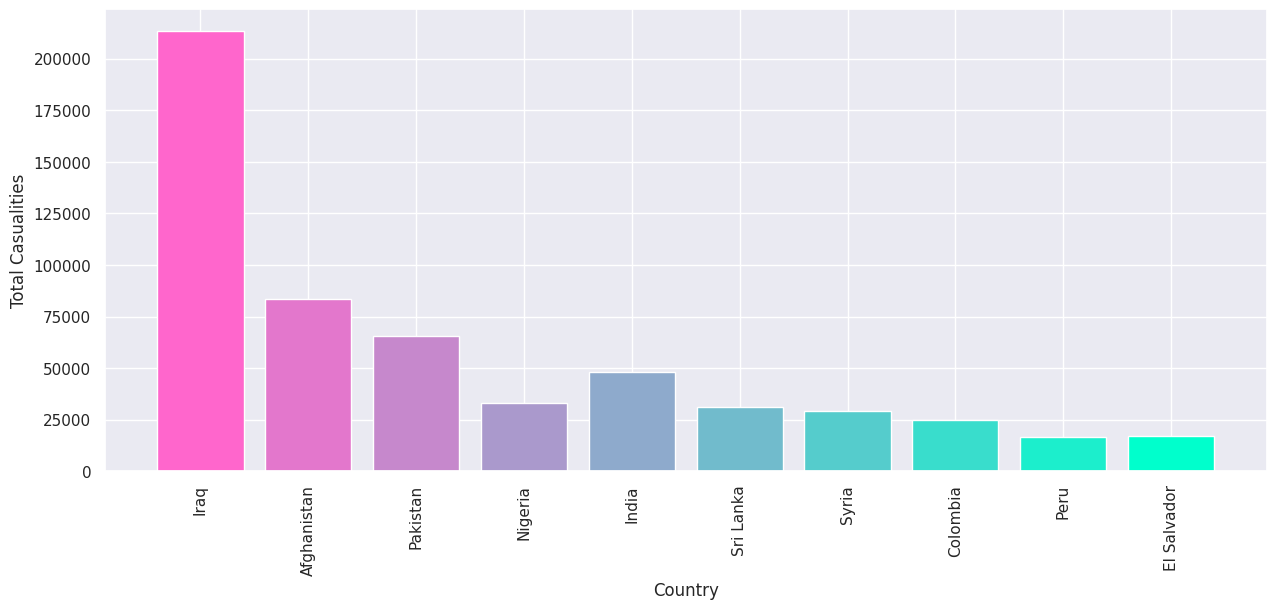

In [96]:
#plotting a bar graph
color1="#ff66cc"
color2="#00ffcc"
plt.bar(most_affected_country['Country'].head(10),most_affected_country['Total_casualities'].head(10), color= get_color_gradient(color1, color2, n=10))
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Total Casualities")
plt.show()


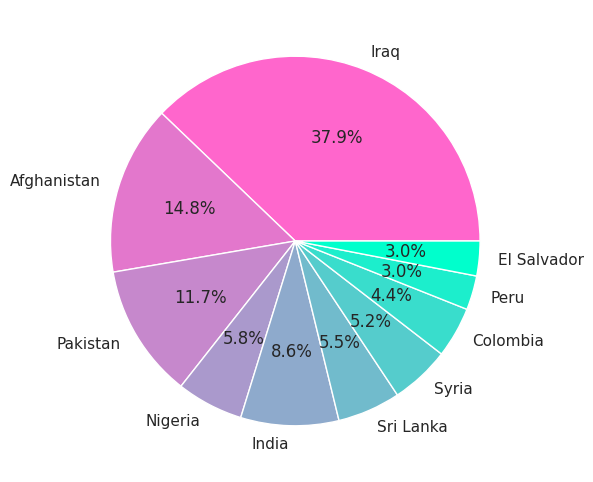

In [97]:
#same data as above but a pie plot
#showing percentages with respect to top 10
color1="#ff66cc"
color2="#00ffcc"
plt.pie(most_affected_country['Total_casualities'].head(10),labels=most_affected_country['Country'].head(10),autopct='%1.1f%%', colors= get_color_gradient(color1, color2, n=10))
plt.show()

Top 10 affected countries are
1.   Iraq
2.   Afghanistan
3.   Pakistan
4.   India
5.   Nigeria
6.   Sri Lanka
7.   Syria
8.   Colombia
9.   Peru
10.  El Salvador







###9.Most Common Attacks






In [98]:
#getting data from data wrangling section
most_attack_type

,index,AttackType
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


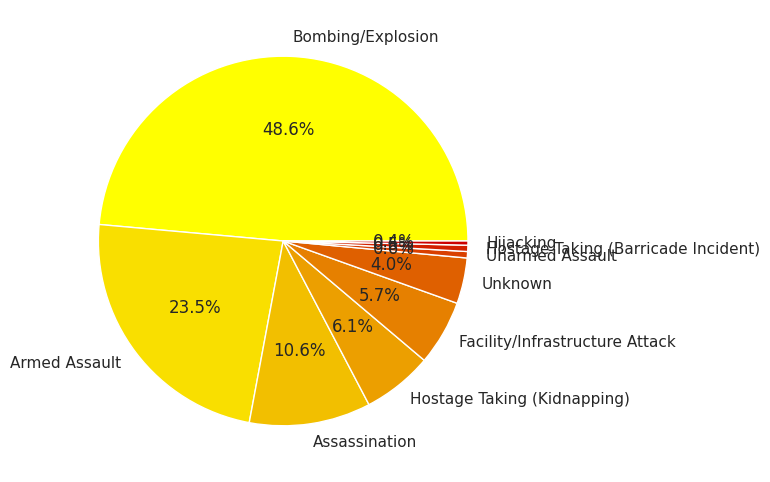

In [99]:
#most_attack_type
#we'll plot a pie chart for it
color1= '#ffff00'
color2='#cc0000'
explode = [0.1] * len(y)
y = most_attack_type['AttackType']
mylabels = most_attack_type['index']
plt.pie(y, labels = mylabels,autopct='%1.1f%%', colors= get_color_gradient(color1, color2, len(y)))#explode= explode can be added for better visualization
plt.show()


###10.Most popular weapon

In [100]:
#storing value of most popular weapon in dfw
dfw=df['Weapon_type'].value_counts().reset_index()

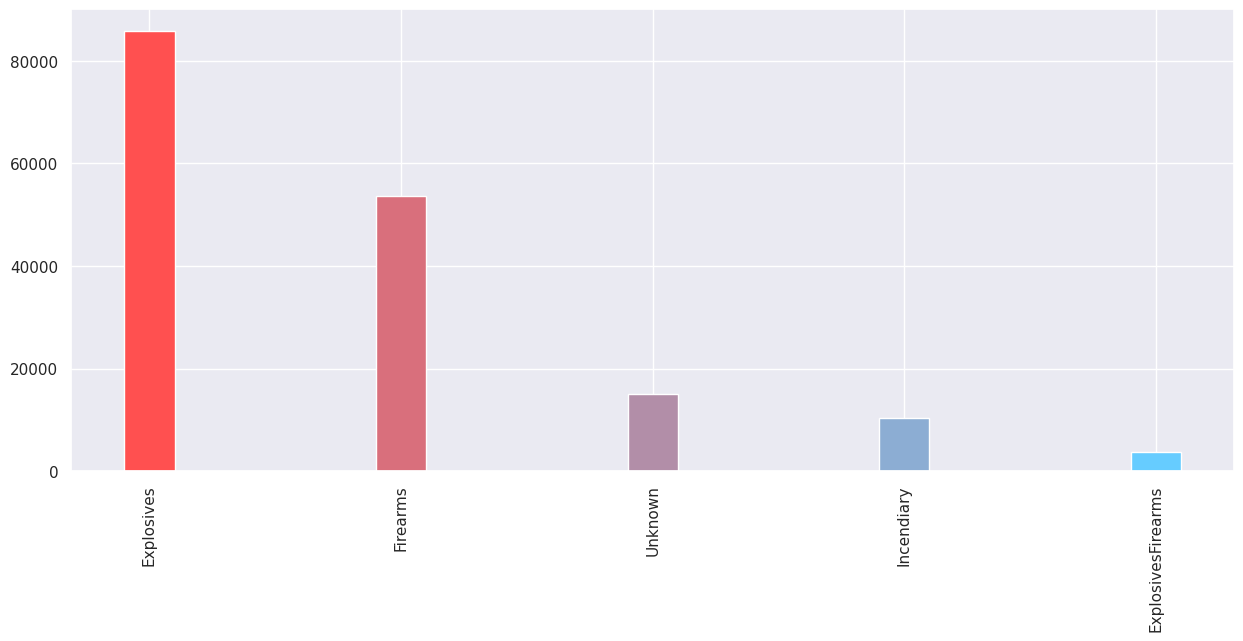

In [101]:
#plotting a bar chart
color1="#ff5050"
color2="#66ccff"
plt.bar(dfw['index'].head(5),dfw['Weapon_type'].head(5), color= get_color_gradient(color1, color2, n=5), width=0.2)
plt.xticks(rotation=90)
plt.show()

Explosives are the most common type of weapon used  and it has taken lives of more than 80000 people worldwide

###11.Countries that are the most affected and the type of attacks these countries suffered form ?

Catplot is used to depict the distribution of attack type in most affected countries.

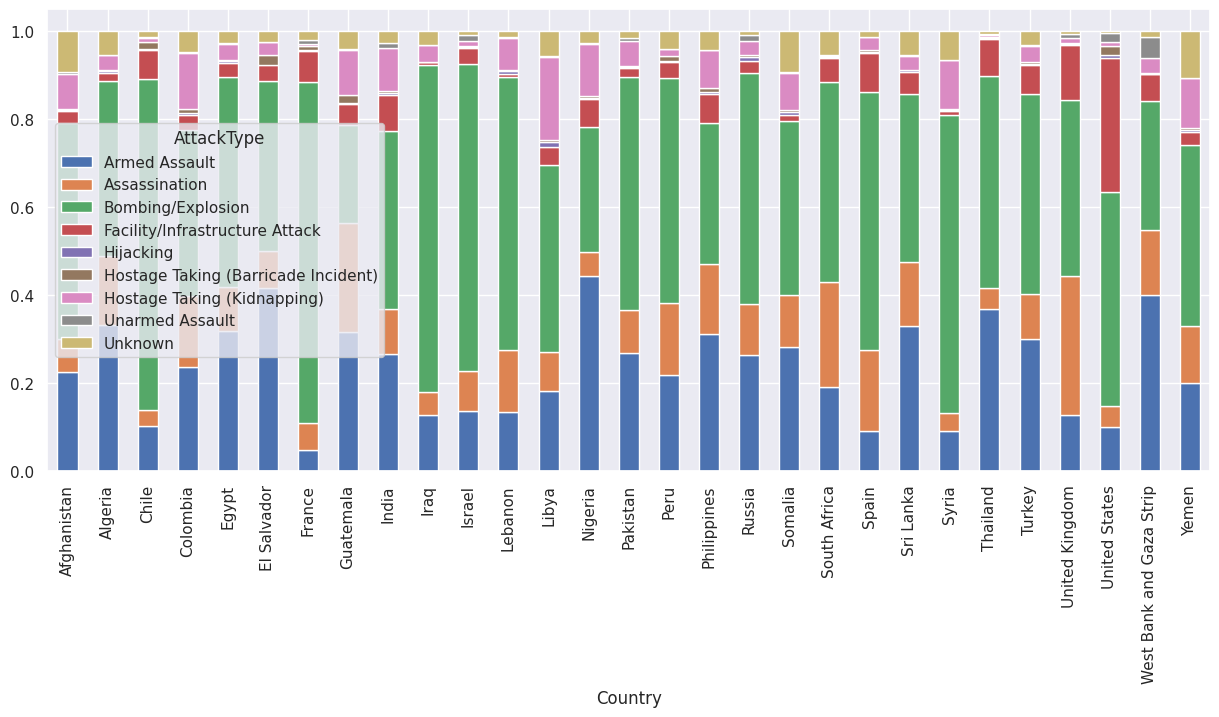

In [102]:
country_counts = df['Country'].value_counts()

# select countries with count more than 2000
selected_countries = country_counts[country_counts > 2000].index

# filter the dataset to include only the selected countries
selected_data = df[df['Country'].isin(selected_countries)]

# create cross-tabulation of selected data
cross_tab = pd.crosstab(selected_data['Country'], selected_data['AttackType'], normalize='index')

# plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True , figsize=(15,6))
#stacked=True tells the method to stack the bars on top of each other rather than placing them side by side.

plt.show()

Amongst the total attack types, bombing/explosion was the most prefferd attack type of the terrorist organizations.

Based on the analysis of the chosen attack types, it has been observed that Bombing, Armed assault, and Assassination collectively account for 83% of the total attacks.

Amongst the targeted countries Iraq, Pakistan, Afghanistan, India suffered the most.

In countries like : Algeria, El Salvador , Gautemala , Nigeria , Phillipines , Sri Lanks , West Bank and Gaza Strip. Armed assault and Assassination together constitues almost 50% of the total attacks . This does not mean that these countries are saved from bombings and explosions as the next half is dominated by bombings.

Facility/Infrastructure attacks are seen the most in US.

Hostage taking is seen the most in countries like Libya (North Africa). Other countries in the list are

African Countries : Nigeria , Somalia

Asian Countries : India , Philippines

Latin American Countries : Guatemala , Colombia

Middle East Countries : Yemen , Syria

Hijacking is seen the most in Libya (North Africa). Other countries in the list are US Russia Somalia Egypt Phillipines

Bombings/Explosions constitues a significant share in total attack types in almost all the countries but it occupies almost 80-90% of the share in countries like : France, Chile, Iraq

A lot of attack data from countries like Yemen , Somalia , Libya , Afghanistan is unknown.

###11.Year wise distribution of attack frequency in most affected countries that have witnessed more than 1000 attacks in these 47 years i.e between 1970-2017.

We'll use a heat map to get information of worst terror attacks

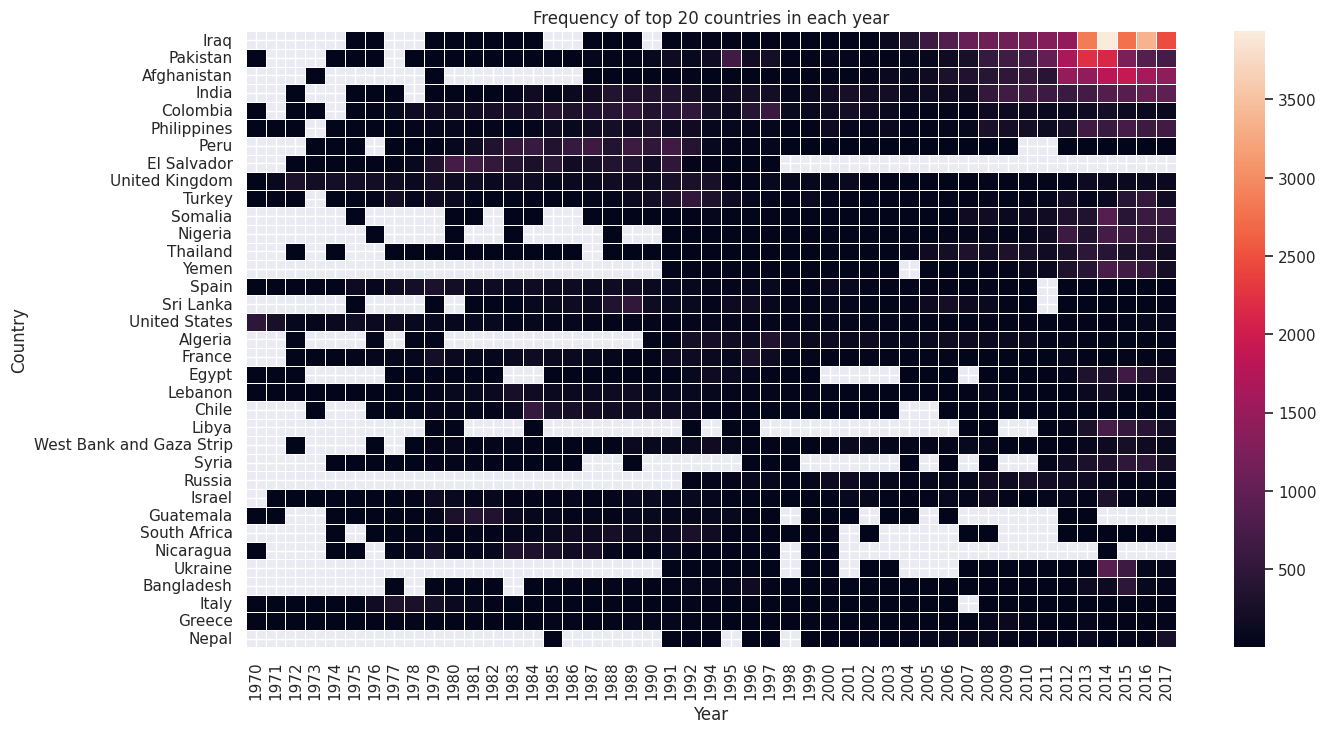

In [103]:
# select the columns of interest
#dfc is data frame storing year and country
dfc = df[['Year', 'Country']]

country_counts1 = df['Country'].value_counts()

# select countries with count more than 1000
selected_countries1 = country_counts1[country_counts1 > 1000].index.tolist()

selected_data1 = df[df['Country'].isin(selected_countries1)]

# group by year and country, then count the number of attacks for each year and country combination.
mf = selected_data1.groupby(['Year', 'Country']).size().reset_index(name='count')

# pivot the data to have years as columns and countries as rows
mf_pivot = mf.pivot(index='Country', columns='Year', values='count')

# sort by the total number of attacks in descending order
mf_pivot = mf_pivot.loc[mf_pivot.sum(axis=1).sort_values(ascending=False).index]

# plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(mf_pivot, annot=False, fmt=".1f", linewidths=.5)
plt.title('Frequency of top 20 countries in each year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


Attacks in Iraq are on a rise and touched its peak in 2014.
Afghanistan and Pakistan both the countries witnessed increased attack frequency in 2008-2015 but are currently showing a declining trend.
India is showing a continuous upward trend in attack frequency. Attacks in Phillipines are also on a rise.

###12.Name of the countries that have been attacked by a large number of different terrorist organizations.

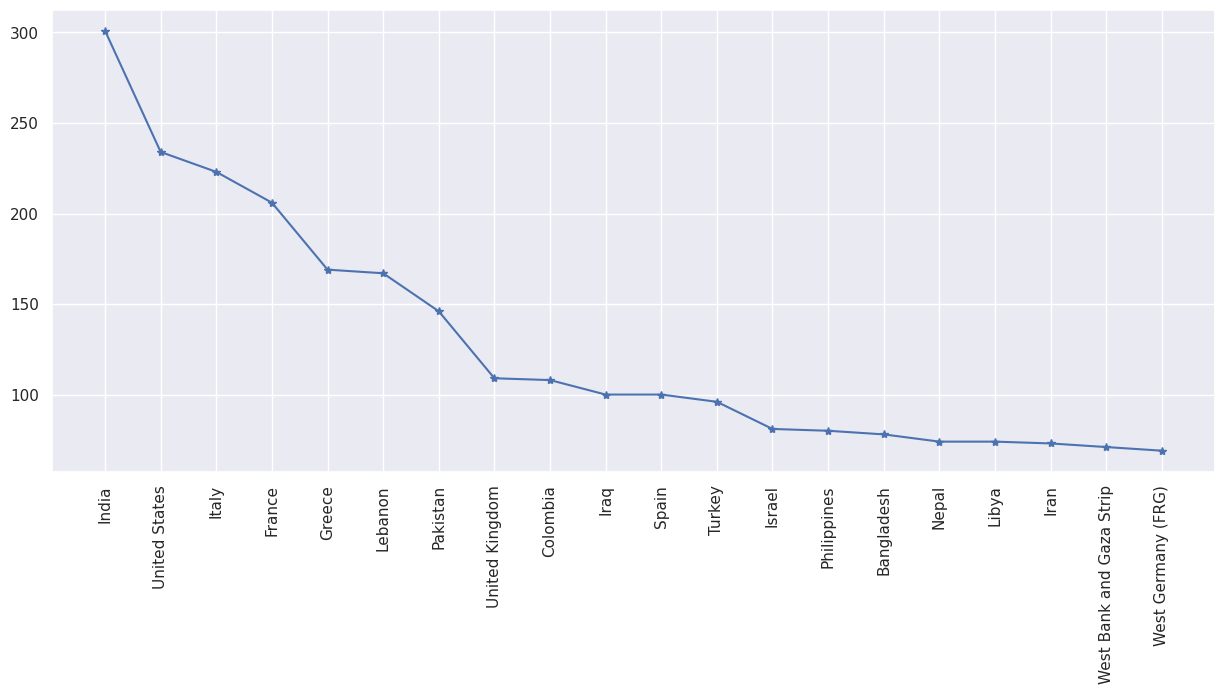

Country
India                       301
United States               234
Italy                       223
France                      206
Greece                      169
Lebanon                     167
Pakistan                    146
United Kingdom              109
Colombia                    108
Iraq                        100
Spain                       100
Turkey                       96
Israel                       81
Philippines                  80
Bangladesh                   78
Nepal                        74
Libya                        74
Iran                         73
West Bank and Gaza Strip     71
West Germany (FRG)           69
Name: Group, dtype: int64


In [104]:
# Grouping countries with organizations
group_country = df.groupby('Country')['Group'].nunique()
#.nunique() : it returns the number of unique elements in a pandas Series or DataFrame.

group_country.sort_values(ascending= False , inplace= True)

# taking top 20 countries
group_country_20 = group_country.head(20)

plt.plot(group_country_20,marker='*')
plt.xticks(rotation=90)
plt.show()
#getting values for better understanding
print(group_country_20)

We can see that India has been attacked by 301 different groups, United States has been attacked by 234 different group and then Italy which has been attacked by 223 different groups

###13.Deaths per Year

In [105]:
#making a dataframe dfx and assigning value of deaths per year in it
dfx=pd.DataFrame(df.groupby('Year')["Killed"].sum()).reset_index()

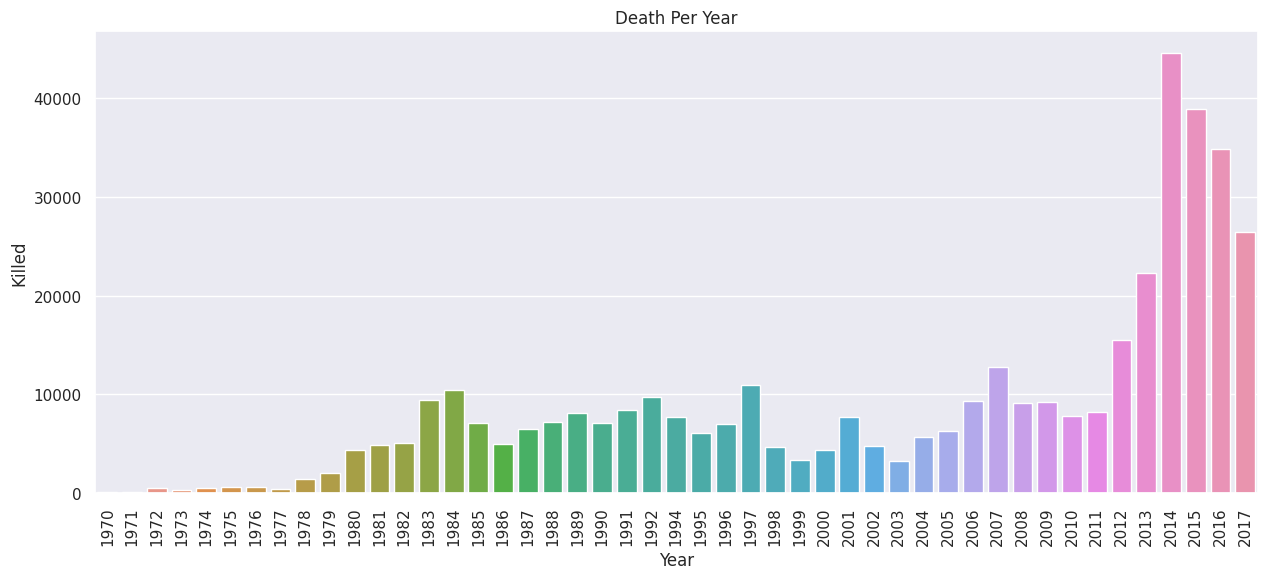

In [106]:
#plotting a bar plot
sns.set(rc={'figure.figsize': (15, 6)})# set figure size
sns.barplot(data=dfx,x='Year',y='Killed')
plt.title("Death Per Year")
plt.xticks(rotation=90)
plt.show()

We can see that there is a sharp rise in number of deaths after 2011 till year 2014 and after 2014 we can see decline in deaths

## **5. Solution to Business Objective**

1. Travel Safety: Organizations in the travel industry can use the GTD to identify high-risk areas and implement measures to enhance the safety of travelers and mitigate potential threats.

2. Market Analysis: Businesses can evaluate the security environment in different regions to make informed decisions about market entry, expansion, or investment opportunities.

3. Risk Assessment: Organizations can assess the risk of terrorism in different regions or countries to make informed decisions about business operations, investments, and resource allocation.

4. Employee Safety: Understanding terrorism patterns can help organizations develop safety protocols and provide guidance to employees working in high-risk areas.



# **Conclusion**

1. Most of the attacks were attacked through explosives and then through firearms.
2. Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. But from 2014 onwards count started decreasing.
3. Almost Every day has the same contribution but attacks were low during 31st and high during 15th and 1st.
4. Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.
5. The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.
6. For most of the attacks, the target is Private Citizens& property and the next Military leads.
7. Most of the attacks were through either Bombing or Explosion.

#END